### Is there any seasonal effect in Seattle airbnb listing price? What would be best time to visit if I want to save some money?




In [1]:
# Import libraries
import pandas as pd
import numpy as nm
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None  # default='warn'

# Load csv into dataframes
calender_df= pd.read_csv('..//data//calendar.csv')

# Initial data lookup
def get_shape(df):
    print('The shape of the dataframe is : '+ str(df.shape))
    
def get_head(df, rows = 5):
    print("########################################################################")
    print(df.head(rows))

In [2]:
# Get Shape
get_shape(calender_df);

The shape of the dataframe is : (1393570, 4)


In [3]:
# Get head
get_head(calender_df);

########################################################################
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


In [4]:
# Missing Values
def get_missing_values_by_column(df):
    all_cols = df.columns.values
    print(all_cols)
    for col in all_cols:
        missing_percent = df[col].isnull().mean()
        if missing_percent > 0:
            print("Column " + col + " has " + str(float("{0:.2f}".format(missing_percent * 100))) + "% missing values" )
            
get_missing_values_by_column(calender_df)

['listing_id' 'date' 'available' 'price']
Column price has 32.94% missing values


In [5]:
# Replace t and f in 'available' coulnm by 1 and 0 repsp to count 
calender_df['available'].replace(['t','f'],[1,0],inplace=True)

#Replace NaNs in price ccolumn by 0
calender_df.fillna(value=0,inplace=True)


In [6]:
def get_float_val (df):
    df.replace(regex=True,inplace=True,to_replace='[^a-zA-Z0-9\n\.]',value='')
    df = df.astype(dtype='float')
    # since host left it blank..replacing null values with 0 
    return df.fillna(value = 0).copy()

In [7]:
get_float_val(calender_df['price'])
get_head(calender_df);

########################################################################
   listing_id        date  available  price
0      241032  2016-01-04          1  85.00
1      241032  2016-01-05          1  85.00
2      241032  2016-01-06          0      0
3      241032  2016-01-07          0      0
4      241032  2016-01-08          0      0


In [15]:
def count_days_since(oldDate):
    return oldDate.month
# host since
calender_df['Month'] = pd.to_datetime(calender_df.date).apply(count_days_since)
calender_df['price'] = calender_df['price'].astype(dtype='float')
calender_df['Month'] = calender_df['Month'].astype(dtype='int')
calender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 5 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null int64
price         1393570 non-null float64
Month         1393570 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 53.2+ MB


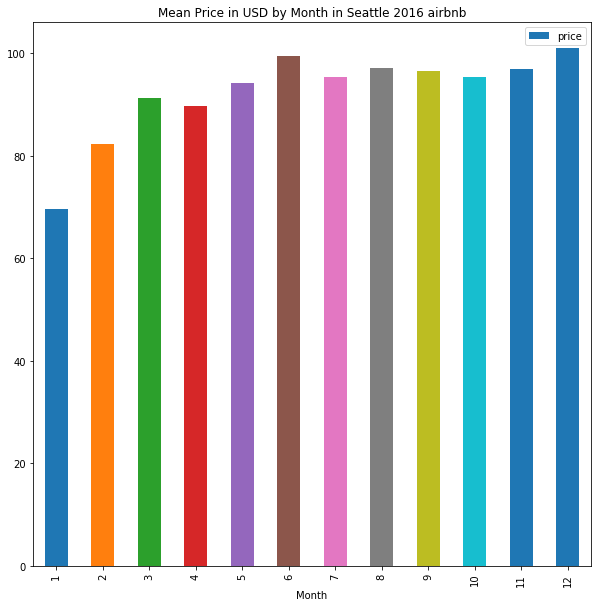

In [16]:
datas = calender_df.groupby(['Month']).price.mean()
_ = datas.plot(kind='bar',figsize=(10,10),title='Mean Price in USD by Month in Seattle 2016 airbnb',y= 'Mean Price in $',legend=True)


In [ ]:
import matplotlib.pyplot as plt

#Step 1 - Prepare Data
data = calender_df

#Step 2 - Create Plot
fig = plt.figure()

#Step 3 - Plot
ax = fig.add_subplot(111)

#Step 4 - Customize plot
ax.plot(datas,marker='o')

#Step 5 - plt.show()
plt.show()
    


In [10]:
# Load csv into dataframes
listings_df= pd.read_csv('..//data//listings.csv')

In [11]:
listings_df['price'] = get_float_val(listings_df['price'])
listings_df['price'] = listings_df['price'].astype(dtype='float')
plotg = listings_df.groupby(['zipcode']).price.mean()

zipcode
98101        166.721393
98102        127.103245
98103        124.149746
98104        135.221053
98105        107.111111
98106         82.103448
98107        130.238889
98108         83.875000
98109        150.247525
98112        135.437126
98115        112.129213
98116        145.348214
98117        111.262195
98118         93.798701
98119        166.377622
98121        153.785714
98122        132.492857
98125         88.577465
98126        122.730159
98133         86.282609
98134        206.600000
98136        137.909091
98144        105.395000
98146         97.800000
98177         98.842105
98178         94.428571
98199        172.393939
99\n98122     67.000000
Name: price, dtype: float64


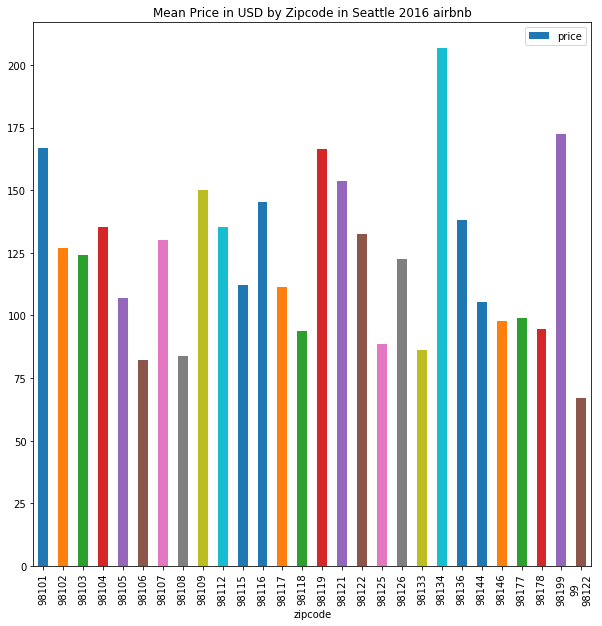

In [12]:
import matplotlib.pyplot as plt
_ = plotg.plot(kind='bar',figsize=(10,10),title='Mean Price in USD by Zipcode in Seattle 2016 airbnb',y= 'Mean Price in $',legend=True)
print(plotg)